# Data Acqui. Task


In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d amitabhajoy/bengaluru-house-price-data

Dataset URL: https://www.kaggle.com/datasets/amitabhajoy/bengaluru-house-price-data
License(s): CC0-1.0
  0% 0.00/195k [00:00<?, ?B/s]
100% 195k/195k [00:00<00:00, 509MB/s]


In [5]:
!unzip bengaluru-house-price-data.zip

Archive:  bengaluru-house-price-data.zip
  inflating: Bengaluru_House_Data.csv  


# Importing libraires

In [8]:
import pandas as pd

df = pd.read_csv("Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [12]:
# shape
print("shape: ", df.shape)

shape:  (13320, 9)


In [13]:
# columns
print("Columns Names are:",df.columns)


Columns Names are: Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')


In [14]:
# summary
print("Summary of the text:\n", df.describe())

Summary of the text:
                bath       balcony         price
count  13247.000000  12711.000000  13320.000000
mean       2.692610      1.584376    112.565627
std        1.341458      0.817263    148.971674
min        1.000000      0.000000      8.000000
25%        2.000000      1.000000     50.000000
50%        2.000000      2.000000     72.000000
75%        3.000000      2.000000    120.000000
max       40.000000      3.000000   3600.000000


In [16]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


# Column Data Transformation

In [18]:
# To understand category distribution, detect imbalance, and identify noisy or rare classes before encoding
# Informative EDA
for column in df.columns:
    print(df[column].value_counts())
    print("*"*20)

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64
********************
availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
16-Oct               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: count, Length: 81, dtype: int64
********************
location
Whitefield                         540
Sarjapur  Road                     399
Electronic City                    302
Kanakpura Road                     273
Thanisandra                        234
                                  ... 
3rd Stage Raja Rajeshwari Nagar      1
Chuchangatta Colony                  1
Electronic City Phase 1,             1
Chikbasavanapura                     1
Abshot Layout                        1
Name: count, Length: 1305, dtype: int64
********************
siz

In [19]:
df.isnull().sum()

,0
area_type,0
availability,0
location,1
size,16
society,5502
total_sqft,0
bath,73
balcony,609
price,0


In [20]:
df.drop(columns=['area_type','availability','society','balcony'], inplace=True)  # inplace = True means - No new DataFrame is created

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [31]:
# 1. Location
# Total entry 13320 and only 1 NULL so replec that NULL by the max one
df['location'] = df['location'].fillna('Sarjapur Road')
df['location'].value_counts()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [39]:
# 2. size
df['size'].info()
df['size'] = df['size'].fillna('2 BHK') # 73 values were NULL
df['size'].value_counts()
df.info()

<class 'pandas.core.series.Series'>
RangeIndex: 13320 entries, 0 to 13319
Series name: size
Non-Null Count  Dtype 
--------------  ----- 
13320 non-null  object
dtypes: object(1)
memory usage: 104.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13320 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [40]:
# 3. Bath
df['bath'] = df['bath'].fillna(df['bath'].median())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13320 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13320 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


# Data Trans. 2

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13320 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13320 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [43]:
# Bedroom Data is not accurate maintained
df['bhk'] = df['size'].str.split().str.get(0).astype(int)

In [44]:
df[df.bhk > 20]  # these are outliers in data

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [45]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [47]:
# convert ranges into their mean ex (1133+1384)/2
def convertRange(x):
    temp = x.split('-')
    if len(temp) == 2:
        return (float(temp[0]) + float(temp[1]))/2
    try:
        return float(x)
    except:
        return None

In [49]:
df['total_sqft'] = df['total_sqft'].apply(convertRange)

In [51]:
df.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


# Price Per Square Fit

In [53]:
df['price_per_sqft'] = df['price'] * 100000 / df['total_sqft']

In [56]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,112.565627,2.802778,7.907501e+03
std,1238.405258,1.338754,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [57]:
df['location'].value_counts()

,count
location,
Whitefield,540
Sarjapur Road,399
Electronic City,302
Kanakpura Road,273
Thanisandra,234
...,...
Mango Garden Layout,1
Milk Colony,1
"Basnashankari,6th stage,",1


In [58]:
df['location'] = df['location'].apply(lambda x: x.strip())
location_count = df['location'].value_counts()

In [59]:
location_count_less_10 = location_count[location_count <= 10]
location_count_less_10

,count
location,
1st Block Koramangala,10
Dairy Circle,10
Nagadevanahalli,10
Sadashiva Nagar,10
Naganathapura,10
...,...
Xavier Layout,1
Ramanagara Channapatna,1
Maheswari Nagar,1


In [60]:
df['location'] = df['location'].apply(lambda x: 'other' if x in location_count_less_10 else x)

# Outliers Detection and Removal

In [61]:
df.describe()    # like 1 sqft

,total_sqft,bath,price,bhk,price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,112.565627,2.802778,7.907501e+03
std,1238.405258,1.338754,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [62]:
(df['total_sqft']/df['bhk']).describe()

,0
count,13274.000000
mean,575.074878
std,388.205175
min,0.250000
25%,473.333333
50%,552.500000
75%,625.000000
max,26136.000000


In [68]:
df = df[((df['total_sqft']/df['bhk']) >= 300)]
df.describe()

# only keep that i.e > 300
df = df[(df['total_sqft']/df['bhk']) >= 300]
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,12530.000000,12530.000000,12530.000000,12530.000000,12530.000000
mean,1594.564544,2.559537,111.382401,2.650838,6303.979357
std,1261.271296,1.077938,152.077329,0.976678,4162.237981
min,300.000000,1.000000,8.440000,1.000000,267.829813
25%,1116.000000,2.000000,49.000000,2.000000,4210.526316
50%,1300.000000,2.000000,70.000000,3.000000,5294.117647
75%,1700.000000,3.000000,115.000000,3.000000,6916.666667
max,52272.000000,16.000000,3600.000000,16.000000,176470.588235


In [70]:
df.shape

(12530, 7)

In [71]:
df.price_per_sqft.describe()

,price_per_sqft
count,12530.000000
mean,6303.979357
std,4162.237981
min,267.829813
25%,4210.526316
50%,5294.117647
75%,6916.666667
max,176470.588235


In [75]:
import numpy as np
def remove_outliers_sqft(df):
    df_output = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        gen_df = subdf[(subdf.price_per_sqft > (st - st)) & (subdf.price_per_sqft <= (m + st))]
        df_output = pd.concat([df_output, gen_df], ignore_index = True)
    return df_output

df = remove_outliers_sqft(df)
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,11103.000000,11103.000000,11103.000000,11103.000000,11103.000000
mean,1525.391171,2.464829,88.834776,2.572818,5525.930242
std,1216.540501,0.987584,84.369044,0.912931,2262.779737
min,300.000000,1.000000,8.440000,1.000000,267.829813
25%,1102.000000,2.000000,47.000000,2.000000,4090.580899
50%,1278.000000,2.000000,65.000000,2.000000,5032.258065
75%,1645.000000,3.000000,98.000000,3.000000,6320.063898
max,52272.000000,16.000000,2200.000000,16.000000,24509.803922


In [78]:
def bhk_outlier_remover(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

df = bhk_outlier_remover(df)
df.shape

(8083, 7)

In [79]:
df


,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,2 BHK,1000.0,3.0,60.0,2,6000.000000
4,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
...,...,...,...,...,...,...,...
11094,other,2 BHK,1200.0,2.0,70.0,2,5833.333333
11095,other,1 BHK,1800.0,1.0,200.0,1,11111.111111
11098,other,2 BHK,1353.0,2.0,110.0,2,8130.081301
11099,other,1 Bedroom,812.0,1.0,26.0,1,3201.970443


In [80]:
df.drop(columns=['size','price_per_sqft'],inplace=True)

# Cleaned Data

In [88]:
data = df.copy()
data.head(10)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1000.0,3.0,60.0,2
4,1st Block Jayanagar,1200.0,2.0,130.0,3
5,1st Block Jayanagar,1235.0,2.0,148.0,2
6,1st Block Jayanagar,2750.0,4.0,413.0,4
7,1st Block Jayanagar,1760.0,3.0,115.0,3
8,1st Block Jayanagar,2450.0,4.0,368.0,4
10,1st Phase JP Nagar,1875.0,3.0,167.0,3


In [82]:
# to store it into csv file

data.to_csv("Cleaned_data.csv")

# Model

In [89]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# DATA SPLIT

In [90]:
X = df.drop('price', axis=1)
y = df['price']

num_features = ['total_sqft', 'bath', 'bhk']
cat_features = ['location']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# PART 1 — LINEAR MODELS

In [91]:
# 1. Multiple Linear Regression

from sklearn.linear_model import LinearRegression

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
])

model = Pipeline([
    ('prep', preprocessor),
    ('reg', LinearRegression())
])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("R2:", r2_score(y_test, y_pred))


R2: 0.8329166568291603


In [92]:
# 2. Polynomial Regression

poly_model = Pipeline([
    ('prep', ColumnTransformer([
        ('num', Pipeline([
            ('scale', StandardScaler()),
            ('poly', PolynomialFeatures(degree=2, include_bias=False))
        ]), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
    ])),
    ('reg', LinearRegression())
])

poly_model.fit(X_train, y_train)
y_pred = poly_model.predict(X_test)

print("R2:", r2_score(y_test, y_pred))


R2: 0.7318053422675636


# PART 2 — REGULARIZATION

In [93]:
# 3. Ridge Regression

from sklearn.linear_model import Ridge

ridge = Pipeline([
    ('prep', preprocessor),
    ('reg', Ridge(alpha=1.0))
])

ridge.fit(X_train, y_train)
print("R2:", r2_score(y_test, ridge.predict(X_test)))


R2: 0.8413570839596259


In [94]:
# 4. Lasso Regression

from sklearn.linear_model import Lasso

lasso = Pipeline([
    ('prep', preprocessor),
    ('reg', Lasso(alpha=0.01))
])

lasso.fit(X_train, y_train)
print("R2:", r2_score(y_test, lasso.predict(X_test)))


R2: 0.833641213240566


In [95]:
# 5. ElasticNet

from sklearn.linear_model import ElasticNet

elastic = Pipeline([
    ('prep', preprocessor),
    ('reg', ElasticNet(alpha=0.01, l1_ratio=0.5))
])

elastic.fit(X_train, y_train)
print("R2:", r2_score(y_test, elastic.predict(X_test)))


R2: 0.8282524011766924


# PART 3 — KNN

In [96]:
# 6. KNN Regression

from sklearn.neighbors import KNeighborsRegressor

knn = Pipeline([
    ('prep', preprocessor),
    ('reg', KNeighborsRegressor(n_neighbors=5))
])

knn.fit(X_train, y_train)
print("R2:", r2_score(y_test, knn.predict(X_test)))


R2: 0.7504469078020085


# PART 4 — TREE MODELS

In [98]:
# 7. Decision Tree

from sklearn.tree import DecisionTreeRegressor

tree = Pipeline([
    ('prep', preprocessor),
    ('reg', DecisionTreeRegressor(max_depth=10, random_state=42))
])

tree.fit(X_train, y_train)
print("R2:", r2_score(y_test, tree.predict(X_test)))


R2: 0.7695354311314768


In [99]:
# 8. Random Forest

from sklearn.ensemble import RandomForestRegressor

rf = Pipeline([
    ('prep', preprocessor),
    ('reg', RandomForestRegressor(
        n_estimators=200, max_depth=15, random_state=42
    ))
])

rf.fit(X_train, y_train)
print("R2:", r2_score(y_test, rf.predict(X_test)))


R2: 0.774231905503917


In [100]:
# 9. Extra Trees

from sklearn.ensemble import ExtraTreesRegressor

extra = Pipeline([
    ('prep', preprocessor),
    ('reg', ExtraTreesRegressor(
        n_estimators=200, random_state=42
    ))
])

extra.fit(X_train, y_train)
print("R2:", r2_score(y_test, extra.predict(X_test)))


R2: 0.7793816945749679


# PART 5 — BOOSTING

In [101]:
# 10. Gradient Boosting

from sklearn.ensemble import GradientBoostingRegressor

gbr = Pipeline([
    ('prep', preprocessor),
    ('reg', GradientBoostingRegressor(
        n_estimators=200, learning_rate=0.05
    ))
])

gbr.fit(X_train, y_train)
print("R2:", r2_score(y_test, gbr.predict(X_test)))


R2: 0.7153710013920072


In [102]:
# 11. XGBoost

!pip install xgboost


In [103]:
from xgboost import XGBRegressor

xgb = Pipeline([
    ('prep', preprocessor),
    ('reg', XGBRegressor(
        n_estimators=300, learning_rate=0.05,
        max_depth=6, objective='reg:squarederror'
    ))
])

xgb.fit(X_train, y_train)
print("R2:", r2_score(y_test, xgb.predict(X_test)))


R2: 0.7665993986357862


In [105]:
# 12. CatBoost
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.4 MB/s eta 0:00:00


In [106]:
from catboost import CatBoostRegressor

X_cb = df.drop('price', axis=1)
y_cb = df['price']

cat_idx = [X_cb.columns.get_loc('location')]

X_train_cb, X_test_cb, y_train_cb, y_test_cb = train_test_split(
    X_cb, y_cb, test_size=0.2, random_state=42
)

cat = CatBoostRegressor(
    iterations=500,
    learning_rate=0.05,
    depth=8,
    verbose=False
)

cat.fit(X_train_cb, y_train_cb, cat_features=cat_idx)
print("R2:", r2_score(y_test_cb, cat.predict(X_test_cb)))


R2: 0.7550452881939371


# PART 6 — ROBUST MODELS

In [109]:
# 13. Bayesian Ridge - dense data is required
# 14. Huber Regression

from sklearn.linear_model import HuberRegressor

huber = Pipeline([
    ('prep', preprocessor),
    ('reg', HuberRegressor())
])

huber.fit(X_train, y_train)
print("R2:", r2_score(y_test, huber.predict(X_test)))


R2: 0.8383713197360225


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_huber.py:343: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


# PART 7 — DL (ANN)

In [110]:
!pip install tensorflow


In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Input, Embedding, Flatten, Concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


In [120]:
num_features = ['total_sqft', 'bath', 'bhk']

X = df[num_features].values
y = df['price'].values

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [121]:
model_19 = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

model_19.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [123]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

history_19 = model_19.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=200,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/200
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3038.6196 - mae: 27.6241 - val_loss: 2183.0078 - val_mae: 23.5009
Epoch 2/200
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4239.2480 - mae: 28.4920 - val_loss: 2180.9385 - val_mae: 24.3726
Epoch 3/200
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4527.3384 - mae: 29.7291 - val_loss: 2228.9976 - val_mae: 23.6202
Epoch 4/200
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3541.8311 - mae: 28.5340 - val_loss: 2203.3154 - val_mae: 23.9302
Epoch 5/200
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3806.8735 - mae: 28.9440 - val_loss: 2187.1714 - val_mae: 23.8098
Epoch 6/200
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3286.4233 - mae: 28.3732 - val_loss: 2196.6501 - val_mae: 23.6636
Epoch 7/200
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3055.7100 - mae: 27.2504 - val_loss: 2172.3406 - val_mae: 24.0736
Epoch 8/200
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3098.8325 - mae: 28.3209 - val_loss: 2195.9463 - v

In [124]:
y_pred_19 = model_19.predict(X_test).flatten()

print("MODEL 19 RESULTS")
print("MAE:", mean_absolute_error(y_test, y_pred_19))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_19)))
print("R2:", r2_score(y_test, y_pred_19))


51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
MODEL 19 RESULTS
MAE: 23.9442559584203
RMSE: 44.07296748885746
R2: 0.784719578382501


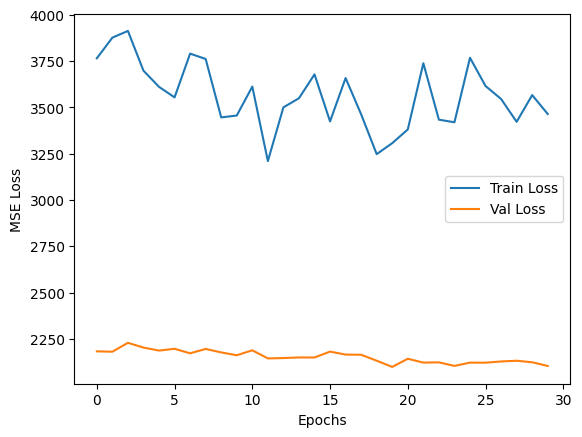

In [125]:
plt.figure()
plt.plot(history_19.history['loss'], label='Train Loss')
plt.plot(history_19.history['val_loss'], label='Val Loss')
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.legend()
plt.show()


# MODEL 20

In [126]:
le = LabelEncoder()
df['location_encoded'] = le.fit_transform(df['location'])

num_locations = df['location_encoded'].nunique()


In [127]:
X_num = df[num_features].values
X_num = StandardScaler().fit_transform(X_num)

X_loc = df['location_encoded'].values
y = df['price'].values

X_num_train, X_num_test, X_loc_train, X_loc_test, y_train, y_test = train_test_split(
    X_num, X_loc, y, test_size=0.2, random_state=42
)


In [128]:
X_num = df[num_features].values
X_num = StandardScaler().fit_transform(X_num)

X_loc = df['location_encoded'].values
y = df['price'].values

X_num_train, X_num_test, X_loc_train, X_loc_test, y_train, y_test = train_test_split(
    X_num, X_loc, y, test_size=0.2, random_state=42
)


In [130]:
# Numeric input
num_input = Input(shape=(X_num.shape[1],))

# Location embedding input
loc_input = Input(shape=(1,))
loc_embed = Embedding(
    input_dim=num_locations,
    output_dim=10
)(loc_input)
loc_embed = Flatten()(loc_embed)

# Merge
merged = Concatenate()([num_input, loc_embed])

x = Dense(64, activation='relu')(merged)
x = Dropout(0.2)(x)
x = Dense(32, activation='relu')(x)
output = Dense(1)(x)

model_20 = Model(inputs=[num_input, loc_input], outputs=output)

model_20.compile(
    optimizer=Adam(0.001),
    loss='mse',
    metrics=['mae']
)


In [131]:
history_20 = model_20.fit(
    [X_num_train, X_loc_train],
    y_train,
    validation_split=0.2,
    epochs=200,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/200
162/162 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 15651.4961 - mae: 91.4583 - val_loss: 6956.2412 - val_mae: 50.3214
Epoch 2/200
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6214.4521 - mae: 39.7803 - val_loss: 3202.4856 - val_mae: 28.8751
Epoch 3/200
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3919.6599 - mae: 28.4073 - val_loss: 2560.6260 - val_mae: 24.5691
Epoch 4/200
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4945.7202 - mae: 26.8681 - val_loss: 2216.0239 - val_mae: 22.4545
Epoch 5/200
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2646.2170 - mae: 23.9944 - val_loss: 1961.3590 - val_mae: 21.6605
Epoch 6/200
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2948.4702 - mae: 23.3620 - val_loss: 1850.5021 - val_mae: 21.7801
Epoch 7/200
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2597.6411 - mae: 22.5824 - val_loss: 1778.0073 - val_mae: 21.3708
Epoch 8/200
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2025.3719 - mae: 21.4108 - val_loss: 1706.6807 - 

In [132]:
y_pred_20 = model_20.predict([X_num_test, X_loc_test]).flatten()

print("MODEL 20 RESULTS (WITH LOCATION EMBEDDING)")
print("MAE:", mean_absolute_error(y_test, y_pred_20))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_20)))
print("R2:", r2_score(y_test, y_pred_20))


51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
MODEL 20 RESULTS (WITH LOCATION EMBEDDING)
MAE: 17.329614072621567
RMSE: 31.89461290026944
R2: 0.8872556933282157


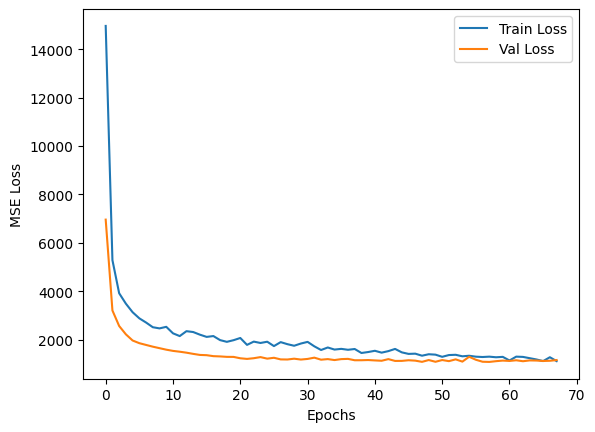

In [133]:
plt.figure()
plt.plot(history_20.history['loss'], label='Train Loss')
plt.plot(history_20.history['val_loss'], label='Val Loss')
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.legend()
plt.show()
